In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
titanic = sns.load_dataset('titanic')

#clean the data set

titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1], inplace=True)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

#y keeps only the column survived
y = titanic['survived']

#x keeps every other columns
x = titanic.drop('survived', axis=1)

3


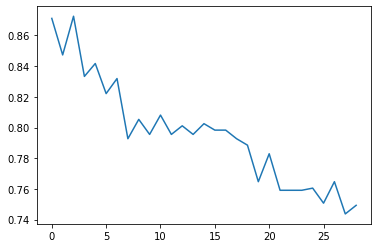

In [45]:
#most optimized number of neighbors
best_k = 1

#prediction_score
best_score = 0

#all scores
scores = []


#test the prediction score from to 30 neighbors
for k in range (best_k, 30):
    
    #creation of the classification model
    model = KNeighborsClassifier(n_neighbors = k)
    
    #fit the model to x and y 
    model.fit(x,y)
    
    #add the prediciton score of the model to the list of all scores
    scores.append(model.score(x,y))
    
    #if the new score is better than the previous best, it becomes the best_k
    if best_score < model.score(x,y):
        best_k = k
        best_score = model.score(x,y)

#print the more optimized number of neighbors        
print(best_k)
plt.plot(scores)